### Evaluating Classifiers for Credit Card Default Client 

This program is an implementation of Classification Problem. We have implemented three classification model namely Logistic 
Regression, Decision Trees, Neural Networks. For each model, Grid Search technique is implemented to find best set of hyper-
parameters.

Name: Jay Joshi

Student id: 200440993

Course: Machine Learning Fall 2020

### Requrirements to Run our code

1. Python 3.6
2. Sci-kit Learn
3. Pandas
4. Numpy
5. Graphviz
6. Seaborn
7. Matplotlib


### Import Necessary Libararies

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree.export import export_text
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import graphviz 
from graphviz import Source
# from IPython.display
from sklearn import metrics
from sklearn.metrics import (f1_score, confusion_matrix, mean_squared_error, mean_absolute_error, 
classification_report, roc_auc_score, roc_curve, precision_score, recall_score)



### Read the data Set 

In [78]:
import pandas as pd
data=pd.read_csv("Credit.csv")
data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  dpnm  
0         0         0         0     1  
1      1000         0      2000     1  
2      1000      1000      5000     0  
3      1100      1069      1000     0  
4      9000       689       679     0  

[5 rows x 25 columns]

### Drop Uncessary Columns

In [79]:
data=data.drop(['ID'], axis=1)
data.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  dpnm  
0         0         0         0     1  
1      1000         0      2000     1  
2      1000      1000      5000     0  
3      1100      1069      1000     0  
4      9000       689       679     0  

[5 rows x 24 columns]

### Data Pre-processing
Check for duplicate and null values

In [80]:
data=data.drop_duplicates()
print("The duplicate rows were removed.")
print(data.duplicated().sum)

The duplicate rows were removed.
<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 29965, dtype: bool>


In [81]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  29965 non-null  int64
 1   SEX        29965 non-null  int64
 2   EDUCATION  29965 non-null  int64
 3   MARRIAGE   29965 non-null  int64
 4   AGE        29965 non-null  int64
 5   PAY_1      29965 non-null  int64
 6   PAY_2      29965 non-null  int64
 7   PAY_3      29965 non-null  int64
 8   PAY_4      29965 non-null  int64
 9   PAY_5      29965 non-null  int64
 10  PAY_6      29965 non-null  int64
 11  BILL_AMT1  29965 non-null  int64
 12  BILL_AMT2  29965 non-null  int64
 13  BILL_AMT3  29965 non-null  int64
 14  BILL_AMT4  29965 non-null  int64
 15  BILL_AMT5  29965 non-null  int64
 16  BILL_AMT6  29965 non-null  int64
 17  PAY_AMT1   29965 non-null  int64
 18  PAY_AMT2   29965 non-null  int64
 19  PAY_AMT3   29965 non-null  int64
 20  PAY_AMT4   29965 non-null  int64
 21  PAY_AMT5   2

In [82]:
print(data.isna().any().sum())

0


### Differentiate dependent and Independent variable 

In [83]:
#  Distinguish attribute columns and class column.
X=data[data.columns[:-1]]
y=data['dpnm']
X.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     -2  ...        689          0          0          0         0       689   
1      0  ...       2682       3272       3455       3261         0      1000   
2      0  ...      13559      14331      14948      15549      1518      1500   
3      0  ...      49291      28314      28959      29547      2000      2019   
4      0  ...      35835      20940      19146      19131      2000     36681   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0         0         0         0         0  
1      1000      1000         0      2000  
2      1000      1000      1000      5000  
3      1200      1100      1069      1000  
4     10000      9000       689       679  

[5 rows x 23 columns]

### Divide Data Randomly in Train and Test Set
We have used 20% of test data 

In [84]:
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2,stratify=y, random_state=25)

### Perform Standardisation

In [85]:
# Standardization
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [86]:
train_X

array([[-1.05829464,  0.80816296,  0.18282135, ..., -0.25394282,
        -0.31460366, -0.28846317],
       [-0.2875192 ,  0.80816296,  0.18282135, ..., -0.22905808,
        -0.31460366, -0.28846317],
       [-0.36459674, -1.2373742 ,  0.18282135, ..., -0.30246807,
        -0.31460366, -0.28846317],
       ...,
       [-0.90413955,  0.80816296,  0.18282135, ..., -0.24741058,
        -0.25756281, -0.23966532],
       [ 0.32910115,  0.80816296,  0.18282135, ..., -0.1158325 ,
        -0.12124485, -0.15061613],
       [-0.82706201,  0.80816296,  0.18282135, ..., -0.1158325 ,
        -0.12124485, -0.10622939]])

### Logistic Regression

In [104]:
logistic_regression = LogisticRegression(multi_class='auto', random_state=25, n_jobs=-1)

# Train the model.
logistic_regression.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=25,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

### Make Predictions on Test Data

In [105]:
logistic_prediction = logistic_regression.predict(test_X)

logistic_regression_cv = cross_val_score(logistic_regression, train_X, train_Y , cv=10).mean()

### Accuracy, Precision, Recall, F1-score For Logistic Regression

In [106]:
# Calculate Accuracy: 1
print('Accuracy: %.3f' % logistic_regression.score(test_X, test_Y))

# Cross-Validation accuracy
print('Cross-validation accuracy: %0.3f' % logistic_regression_cv)

# Calculate Precision
print('Precision: %.3f' % precision_score(test_Y, logistic_prediction))

# Calculate Recall
print('Recall: %.3f' % recall_score(test_Y, logistic_prediction))

# Calculate f1 score:
print('F1 score: %.3f' % f1_score(test_Y, logistic_prediction))

Accuracy: 0.808
Cross-validation accuracy: 0.811
Precision: 0.701
Recall: 0.232
F1 score: 0.348


### Grid Search For Logistic Regression 

In [107]:
# List of hyper parameters to be tuned 
parameters = {'C':[0.0001, 0.001, 0.01, 1, 0.1, 10, 100, 1000], 'penalty':['none','l2'] ,
              'solver':['lbfgs','sag','saga','newton-cg']}

default_logistic_regression=LogisticRegression(multi_class='auto', random_state=25, n_jobs=-1)

# GridSearchCV
grid_search_logistic_regression = GridSearchCV(default_logistic_regression, parameters, cv=10, n_jobs=-1, verbose=1)

# Train the GridSearchCV model to find optimal hyper-parameters
grid_search_logistic_regression.fit(train_X,train_Y)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  3.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=25, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 0.1, 10, 100, 1000],
                         'penalty': ['none', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga', 'newton-cg']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

### Make predicitions on test data with tuned Hyper-parameters

In [108]:
grid_search_logistic_prediction=grid_search_logistic_regression.predict(test_X)


### Accuracy, Precision, Recall, F1-Score with best hyper-parameters

In [109]:
#  Best parameters.
print("Best Logistic Regression Parameters: {}".format(grid_search_logistic_regression.best_params_))

# Cross validation accuracy for the best parameters.
print('Cross-validation accuracy: %0.3f' % grid_search_logistic_regression.best_score_)

# Accuracy: 1 is perfect prediction.
print('Accuracy: %0.3f' % (grid_search_logistic_regression.score(test_X,test_Y)))

# Calculate Precision
print('Precision: %.3f' % precision_score(test_Y, grid_search_logistic_prediction))

# Calculate Recall
print('Recall: %.3f' % recall_score(test_Y, grid_search_logistic_prediction))

# Calculate f1 score
print('F1 score: %.3f' % f1_score(test_Y, grid_search_logistic_prediction))

Best Logistic Regression Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Cross-validation accuracy: 0.811
Accuracy: 0.808
Precision: 0.701
Recall: 0.232
F1 score: 0.348


### Compute AUC Score

In [110]:
#  Predict probabilities for the test data.
logistic_regression_probs = logistic_regression.predict_proba(test_X)

logistic_regression_probs = logistic_regression_probs[:, 1]

# Calculate AUC Score 
auc_log_reg = roc_auc_score(test_Y, logistic_regression_probs)
print('AUC: %.2f' % auc_log_reg)

AUC: 0.72


### Confusion Matrix After Grid Search (Logistic Regression)

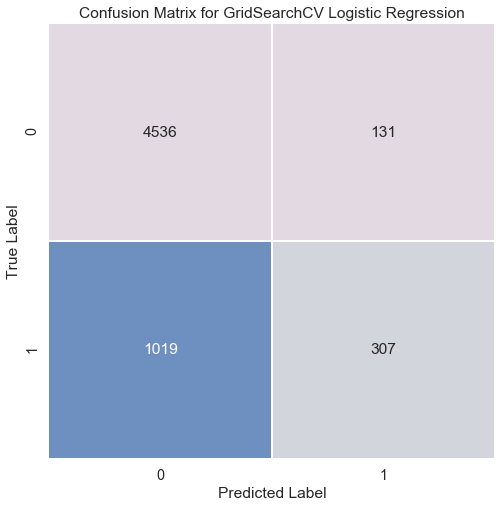

In [111]:
gridsearch_logreg_matrix = confusion_matrix(test_Y,grid_search_logistic_prediction)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(gridsearch_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Logistic Regression');

### Compute AUC Score for Logistic Regression after Grid Search

In [113]:
gridsearch_logreg_probs = grid_search_logistic_regression.predict_proba(test_X)

# Keep Probabilities of the positive class only.
gridsearch_logreg_probs = gridsearch_logreg_probs[:, 1]

# Calculate the AUC Score.
gridsearch_logreg_auc = roc_auc_score(test_Y, gridsearch_logreg_probs)
print('AUC: %.2f' % gridsearch_logreg_auc)

AUC: 0.72


### Plot ROC curve for Logistic Regression

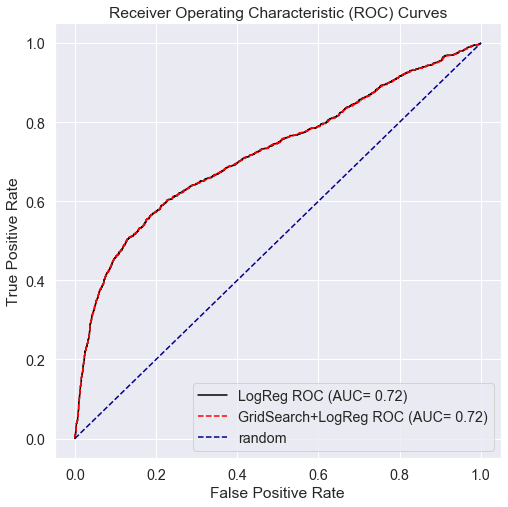

In [114]:
logreg_fpr, logreg_tpr, logreg_thresholds = roc_curve(test_Y, logistic_regression_probs)
gs_logreg_fpr, gs_logreg_tpr, gs_logreg_thresholds = roc_curve(test_Y, gridsearch_logreg_probs)

# Plot the ROC curves.
plt.figure(figsize=(8,8))
plt.plot(logreg_fpr, logreg_tpr, color='black', label='LogReg ROC (AUC= %0.2f)'% auc_logreg)
plt.plot(gs_logreg_fpr, gs_logreg_tpr, color='red', linestyle='--',label='GridSearch+LogReg ROC (AUC= %0.2f)'% gs_logreg_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

### Decision Trees

In [92]:
#  Initialize a decision tree
decision_tree = tree.DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=25)

# Train the estimator.
decision_tree.fit(train_X, train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=25, splitter='best')

### Plot Decision Tree 

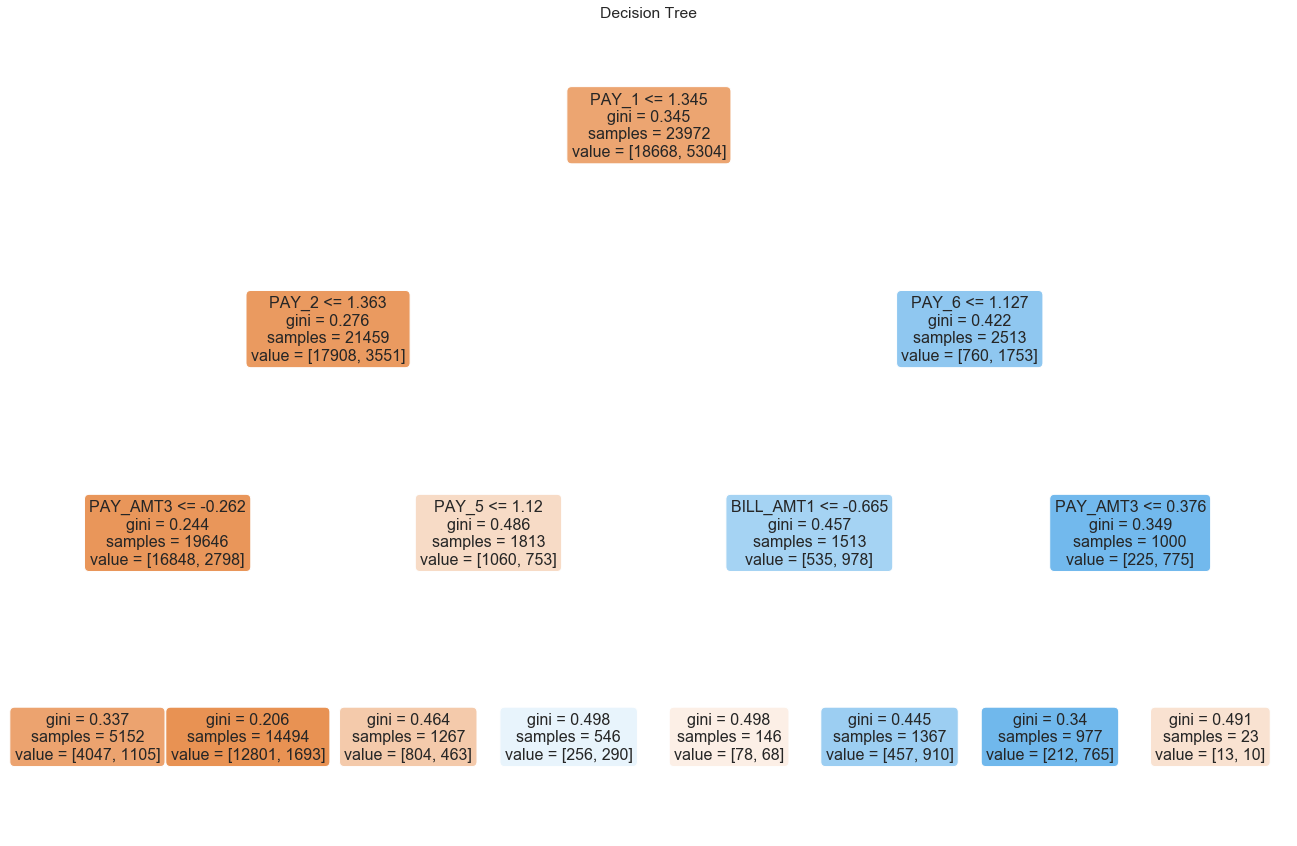

In [93]:
#  Plot the tree.
fig=plt.figure(figsize=(23,15))
tree.plot_tree(decision_tree.fit(train_X, train_Y),feature_names=X.columns,filled=True,rounded=True,fontsize=16);
plt.title('Decision Tree');

### Simplified Version of Decision Tree

In [94]:
#  Print the tree in a simplified version.
s = export_text(decision_tree, feature_names=X.columns.tolist())
print(s)

|--- PAY_1 <= 1.34
|   |--- PAY_2 <= 1.36
|   |   |--- PAY_AMT3 <= -0.26
|   |   |   |--- class: 0
|   |   |--- PAY_AMT3 >  -0.26
|   |   |   |--- class: 0
|   |--- PAY_2 >  1.36
|   |   |--- PAY_5 <= 1.12
|   |   |   |--- class: 0
|   |   |--- PAY_5 >  1.12
|   |   |   |--- class: 1
|--- PAY_1 >  1.34
|   |--- PAY_6 <= 1.13
|   |   |--- BILL_AMT1 <= -0.67
|   |   |   |--- class: 0
|   |   |--- BILL_AMT1 >  -0.67
|   |   |   |--- class: 1
|   |--- PAY_6 >  1.13
|   |   |--- PAY_AMT3 <= 0.38
|   |   |   |--- class: 1
|   |   |--- PAY_AMT3 >  0.38
|   |   |   |--- class: 0



### Make Predictions on Test Data (Decision Trees)

In [95]:

tr_predict = decision_tree.predict(test_X)


tr_cv =cross_val_score(decision_tree, train_X, train_Y, cv=10).mean()


### Accuracy, Precision, Recall, F1-Score (Decision Trees)

In [96]:
# Accuracy:
print('Accuracy: %.3f' % decision_tree.score(test_X, test_Y))

# Cross-Validation accuracy
print('Cross-validation accuracy: %0.3f' % tr_cv)

# Calculate Precision
print('Precision: %.3f' % precision_score(test_Y, tr_predict))

#  Calculate Recall
print('Recall: %.3f' % recall_score(test_Y, tr_predict))

# Calculate f1 score
print('F1 score: %.3f' % f1_score(test_Y, tr_predict))

Accuracy: 0.819
Cross-validation accuracy: 0.821
Precision: 0.669
Recall: 0.362
F1 score: 0.470


### Confusion Matrix for Decision Trees

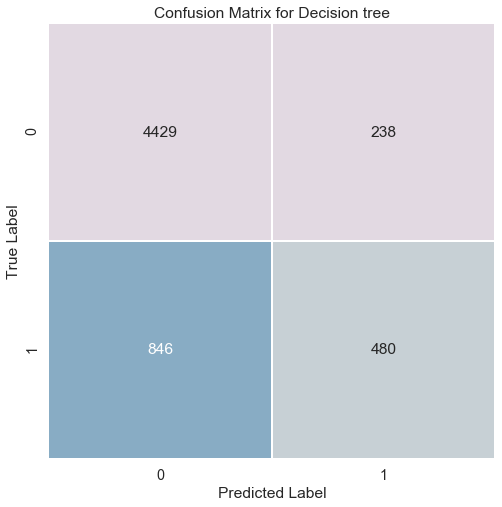

In [43]:
tr_matrix = confusion_matrix(test_Y,tr_predict)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(tr_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision tree');

### Compute AUC Score

In [97]:
tr_probs_value = decision_tree.predict_proba(test_X)

# Keep Probabilities of the positive class only.
tr_probs_value = tr_probs_value[:, 1]

# Compute the AUC Score.
auc_tr_value = roc_auc_score(test_Y, tr_probs_value)
print('AUC: %.2f' % auc_tr_value)

AUC: 0.74


### Grid Search Cv for Decision Trees

In [98]:
#  List of hyper-parameters to be tuned 
parameters = {'criterion':['gini','entropy'],
              'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
             }

# MLP estimator.
default_tr = tree.DecisionTreeClassifier(random_state=25)

# GridSearchCV
grid_search_tree = GridSearchCV(default_tr, parameters, cv=10, n_jobs=-1,verbose=1)

# Train the GridSearchCV model
grid_search_tree.fit(train_X,train_Y)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=25,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                      

### Predict Grid Search Decision Tree model on Test data

In [99]:
grid_search_tree_pred=grid_search_tree.predict(test_X)

### Accuracy, Precision, Recall, F1-Score for Decision Trees (Grid Search CV)

In [100]:
# Best parameters.
print("Best Decision tree Parameters: {}".format(grid_search_tree.best_params_))

# Cross validation accuracy for the best parameters.
print('Cross-validation accuracy: %0.3f' % grid_search_tree.best_score_)

# Accuracy: 1 
print('Accuracy: %0.3f' % (grid_search_tree.score(test_X,test_Y)))

# Precision
print('Precision: %.3f' % precision_score(test_Y, grid_search_tree_pred))

# Recall
print('Recall: %.3f' % recall_score(test_Y, grid_search_tree_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(test_Y, grid_search_tree_pred))

Best Decision tree Parameters: {'criterion': 'entropy', 'max_depth': 3}
Cross-validation accuracy: 0.821
Accuracy: 0.819
Precision: 0.669
Recall: 0.362
F1 score: 0.470


### Confusion Matrix of Grid Search (Decision Trees)

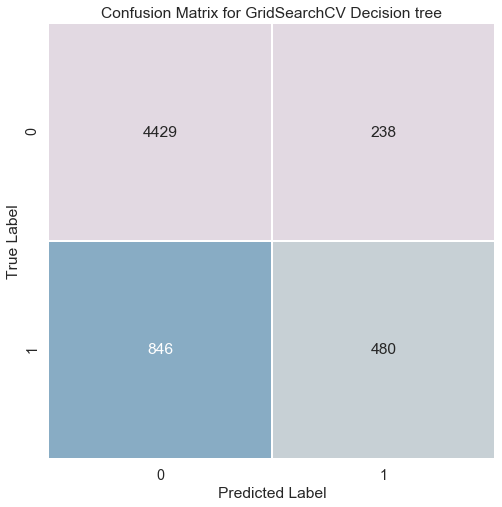

In [101]:
gridsearch_tr_matrix = confusion_matrix(test_Y,grid_search_tree_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(gridsearch_tr_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Decision tree');

### Compute AUC Score (Grid Search)

In [102]:
# Predict probabilities for the test data.
gridsearch_tree_probs = grid_search_tree.predict_proba(test_X)

# Keep Probabilities of the positive class only.
gridsearch_tree_probs = gridsearch_tree_probs[:, 1]

# Compute the AUC Score.
gridsearch_tree_auc = roc_auc_score(test_Y, gridsearch_tree_probs)
print('AUC: %.2f' % gridsearch_tree_auc)

AUC: 0.74


### Plot ROC curve for Decision Trees

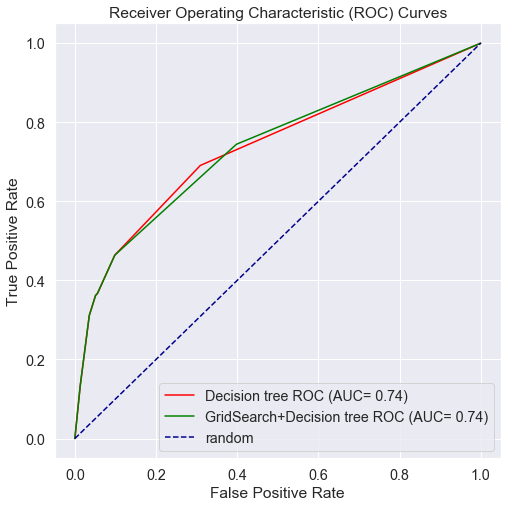

In [103]:
gs_tr_fpr, gs_tr_tpr, gs_tr_thresholds = roc_curve(test_Y, gridsearch_tree_probs)
tr_fpr, tr_tpr, tr_thresholds = roc_curve(test_Y, tr_probs)

# Plot the ROC curves.
plt.figure(figsize=(8,8))
plt.plot(tr_fpr, tr_tpr, color='red', label='Decision tree ROC (AUC= %0.2f)'% auc_tr)
plt.plot(gs_tr_fpr, gs_tr_tpr, color='green', label='GridSearch+Decision tree ROC (AUC= %0.2f)'% gs_tree_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()

### Neural Networks

In [55]:
#  Initialize a Neural Network 
mlp_network = MLPClassifier(hidden_layer_sizes=(12,5),max_iter=1000, random_state=25,shuffle=True, verbose=False)

# Train the model.
mlp_network.fit(train_X, train_Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(12, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=25, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [56]:
# Make predictions.
mlp_network_predict = mlp_network.predict(test_X)

# CV score
mlp_network_cv =cross_val_score(mlp_network, train_X, train_Y, cv=10).mean()

### Compute Accuracy, Precision, Recall, F1-Score for Neural Network

In [57]:
# Accuracy: 1 is perfect prediction.
print('Accuracy: %.3f' % mlp_network.score(test_X, test_Y))

# Cross-Validation accuracy
print('Cross-validation accuracy: %0.3f' % mlp_network_cv)

# Calculate Precision
print('Precision: %.3f' % precision_score(test_Y, mlp_network_predict))

# Calculate Recall
print('Recall: %.3f' % recall_score(test_Y, mlp_network_predict))

# f1 score 
print('F1 score: %.3f' % f1_score(test_Y, mlp_network_predict))

Accuracy: 0.814
Cross-validation accuracy: 0.820
Precision: 0.640
Recall: 0.362
F1 score: 0.462


### Confusion Matrix for Neural Network

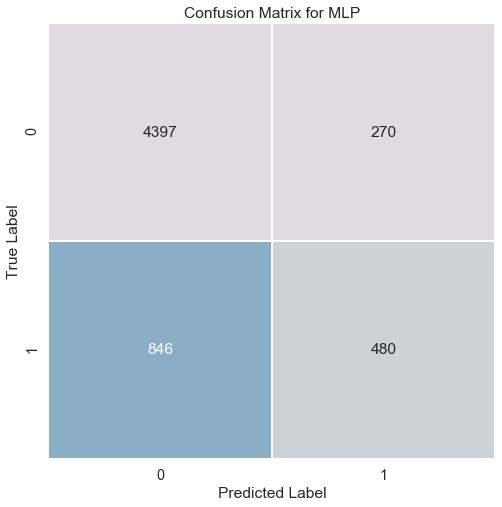

In [59]:
matrix = confusion_matrix(test_Y,mlp_network_predict)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for MLP');

### Compute AUC Score

In [61]:
#  Predict probabilities for the test data.
mlp_network_probs = mlp_network.predict_proba(test_X)

# Keep probabilities of the positive class only.
mlp_network_probs = mlp_network_probs[:, 1]

# Compute the AUC Score.
auc_mlp_network = roc_auc_score(test_Y, mlp_network_probs)
print('AUC: %.2f' % auc_mlp_network)

AUC: 0.77


### Grid Search CV for Neural Networks

In [63]:
# List of hyper-parameters to be tuned 
parameters = {'activation':['logistic','relu'],
              'solver': ['lbfgs','adam','sgd'],
              'alpha':10.0 ** -np.arange(1,3),
              'hidden_layer_sizes':[(23),(12,5),(12,5,2),(3,1),(5)]}


default_mlp_network = MLPClassifier(random_state=42)

# GridSearchCV
gridsearch_mlp_network = GridSearchCV(default_mlp_network, parameters, cv=10, n_jobs=-1,verbose=10)

# Train the GridSearchCV model
gridsearch_mlp_network.fit(train_X,train_Y)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  8

GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...rue,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': 

### Predict on Test data with Grid Search (Neural Network Model)

In [66]:
gridsearch_mlp_predict=gridsearch_mlp_network.predict(test_X)

### Print Best Hyper parameters

### Compute Accuracy, Precision, Recall, F1-Score

In [67]:
# Best parameters.
print("Best MLP Parameters: {}".format(gridsearch_mlp_network.best_params_))

# Cross validation accuracy
print('Cross-validation accuracy: %0.3f' % gridsearch_mlp_network.best_score_)

# Accuracy: 1
print('Accuracy: %0.3f' % (gridsearch_mlp_network.score(test_X,test_Y)))

# Precision
print('Precision: %.3f' % precision_score(test_Y, gridsearch_mlp_predict))

# Recall
print('Recall: %.3f' % recall_score(test_Y, gridsearch_mlp_predict))

# f1 score:
print('F1 score: %.3f' % f1_score(test_Y, gridsearch_mlp_predict))

Best MLP Parameters: {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (12, 5), 'solver': 'adam'}
Cross-validation accuracy: 0.822
Accuracy: 0.818
Precision: 0.659
Recall: 0.369
F1 score: 0.473


### Confusion Matrix for Neural Network (Grid Search CV)

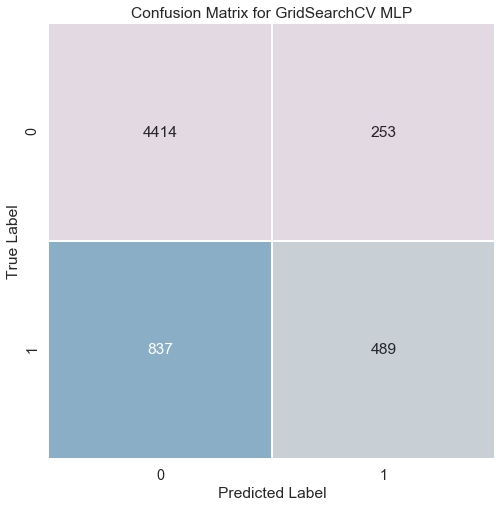

In [69]:
matrix = confusion_matrix(test_Y,gridsearch_mlp_predict)
plt.figure(figsize=(8,8))
sns.heatmap(matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAfYAAAH7CAYAAAA+db1iAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nO3deXhM9+LH8U8im7W21BKRWBMl0SBo9VZLawluq7agUYoqWruKpS2ttUFt91Jb0KKpXVxaLUq1paGtKrHFXhJqCZFVkt8ffuaaJmGQpb73/XqePI+cc+ac74xM3nOWmdilp6enCwAAGME+rwcAAACyD2EHAMAghB0AAIMQdgAADELYAQAwCGEHAMAghB0ZpKamaunSpWrfvr3q1Kkjf39/dezYURs3bsyR7YWFhalBgwaqWbOmvvzyy4de38yZM9WgQYNsGFnWzp49Ky8vL3l5eenHH3/MdJkRI0bIy8tLkydPtnm9KSkpWrJkiVJSUu66nJeXl5YvX35fY75Tdj/mf3X48GGNHDlSjRo1ko+Pj/z9/RUUFGTTz9Dq1avl5eWlpKSkLJcJCgrSwIEDLd8nJydrzpw5atGihXx8fFS7dm0FBQXlyH17ELbcp9u2b9+uN954Q08//bSefPJJtWzZUnPnzrXcNiIiQl5eXtqwYUOmt79586YaNGigDz74INP5wcHB8vLyUqdOnTKdf+7cOXl7e1uNNzg4WO3bt7/ruBs1amR5Tnh5ecnb21t+fn5q3769tmzZcs/7jexD2GElOTlZXbt21dy5c9WuXTuFhYVp+fLleuaZZzRkyBBNmzYtW7eXnp6uCRMm6Nlnn9XGjRvVsGHDh17n66+/rvDw8GwY3b05OjpmGqvk5GR9/fXXsrOzu6/1bdiwQePGjVNaWtpdl9u5c6dat259X+u+LSce8ztt3LhRbdu2VXx8vMaPH6+vvvpKn376qerXr69hw4Zp1qxZd719QECAdu7cKWdnZ5u3+e677+qLL77QgAEDtHHjRi1fvlz+/v7q37+/Vq5c+bB3KddMmTJFb731lnx8fLRgwQKtX79ePXr00KJFi9SrVy8lJyfL399fFSpU0Lp16zJdx44dO/Tnn3/eNcSOjo76+eefFR0dnWFeVi8YbPHqq69q586d2rlzp3bs2KFVq1apcuXKeuutt/Tbb7898HpxfxzyegD4e5k+fboOHDig8PBwubm5WaZXrlxZ9vb2mjFjhlq1aqVKlSply/ZSUlKUkJCgOnXqWG3vYRQsWFAFCxbMlnXdS4MGDbR582a9//77cnD479Np+/btKlKkiAoXLnxf67P186JcXV3va713yonH/LZz585p5MiRat++vd59913L9LJly8rb21slSpTQ2LFj1alTJxUvXjzTdbi4uMjFxcXmbcbFxWndunUKCQnRiy++aJletWpVHT9+XKGhoWrbtu2D36lcsn37ds2dO1ezZs2yuh/ly5eXu7u7OnXqpLVr16p9+/Zq166dpk6dqkuXLqlEiRJW61m9erV8fX3l7e2d5ba8vLwUHR2tL7/8Ul27drWat2HDBvn7++unn3667/uQP39+q5/Nxx9/XKNHj9amTZu0YcMG+fr63vc6cf/YY4dFSkqKVq5cqbZt22b6C79Lly5avHixypUrJ+nWIftFixYpICBAvr6+atSokebMmaPU1FRJ/z1cvXHjRgUGBsrX11dNmjTRnDlzJEm7d++Wj4+PpFuHrRs1aiQp88PMjRo1shzSTktL09SpU/X888+rRo0aeuGFF/TJJ59YovjXQ/FXr17V2LFj9fzzz8vHx0etW7fW119/bZm/evVqPfvss9qwYYOaNm2qmjVr6pVXXtG2bdvu+Zg1b95c169f1w8//GA1fcOGDWrZsmWG5bdt26bAwED5+fmpRo0aCggI0Nq1ay3jGD58uCTJ19dXq1ev1u7du+Xl5aWFCxeqfv36atq0qeLj4y2P0c2bN9WuXTs1a9bMctg0JiZG9erV03vvvZdh+1k95rY+RiEhIfL391dgYGCmL0JWrFghSRoyZEimj9crr7yiTZs2WaIeHBysPn36qFevXvLz89PEiRMzHLaOi4vTyJEjVa9ePfn7+2vq1KkZjmjY29vrhx9+yHAKY9SoUZafN+nWC6cFCxbohRdekK+vr1q2bKmlS5da3Zeff/5Z3bp1U506dVSjRg01btxY8+fPt8yfOXOmOnTooGHDhqlWrVrq37+/JOmPP/5Qv3795O/vrzp16ujNN9/UqVOnrMZz+2esRo0aatmypbZv326Zt3z5clWrVs0q6rfVrl1bixcvVpMmTSRJrVu3lp2dXYa968uXL+vbb7+952HzfPnyqVmzZhmONkVFRenUqVOW7WSH2y947+cIDB4OYYfFmTNndPXqVfn5+WU6v2DBgqpbt67lCTpx4kTNmDFD3bt3V3h4uPr166d58+Zp/PjxVrcbP368unXrprVr16px48b6+OOPFRERIT8/P23dulXSrcjYesh0+fLlCgsLsxzmffvttzVjxgz95z//ybBsamqqXn/9dX333XcaO3as1q1bp+eee05vv/221fnXS5cuKTQ0VOPHj1dYWJiKFi2qoUOHKi4u7q5jKV68uOrXr2/1CzIuLk7ffvutWrVqZbVsZGSk+vTpo4YNG2r9+vVas2aNfHx8NHLkSEVHRysgIEAjRoyQJG3dulUBAQGW227atEnLli3TlClTVKBAAct0BwcHTZ48WTExMZo2bZrS0tI0ZMgQlSpVSiNHjsww3swec1sfo5iYGEVFRWnVqlUaPXp0pqcZfvrpJ/n5+Sl//vyZPl5OTk5yd3e3mrZlyxb5+Pho3bp16ty5c4bbDBw4ULt379a0adO0dOlSnTp1Snv27LHML1SokLp06WJ58TF48GAtW7ZMx48fV8mSJa229/HHH2vx4sUaNmyY/vOf/6hPnz6aNWuWpk6dKkm6cOGCunfvrgoVKmjFihUKDw9Xs2bNFBISon379lnW8+uvv8rJyUnr1q1Tv379FBcXp86dO+vKlSuaP3++5UXX66+/bvViY+nSpZowYYLWrVun0qVLq3///rpx44Yk6ffff8/yuSdJ9evXV9GiRSXd+rlr1KiR1q9fb7VMeHi4nJ2d1aJFiyzXc1uLFi20b98+nTlzxjJt/fr1eu6557LtiNfly5c1fvx4JSUlZeuLBdwdh+JhERsbK0l67LHH7rlsXFycli9frv79+6tNmzaSJA8PD8XGxmrSpEnq27evZdkuXbqoadOmkqShQ4dq+fLl+vnnn+Xv76+SJUtKkgoXLpzlodm/OnnypBwdHVWmTBm5ubnJzc1NZcuWtRxJuNPOnTt14MABrVixwnIYsH///jpy5Ij+/e9/q1mzZpJuXXD03nvvqWbNmpZl2rdvr6NHj971l6106xfkhAkTlJycLCcnJ33zzTeqUKGCKleubLWcnZ2dgoOD9dprr1mm9e7dW2vXrlVUVJQaNGhgOXRfsmRJqz2cbt26qWLFiplu38PDQyNGjND777+vK1eu6Pfff9fKlSsz3UNycnLK8Jhv377dpsdIkvr06aPy5ctn+VhcunRJ1atXt5q2Y8cOy17tbSNGjFC7du0kSQUKFFDfvn0tLxQiIiIsyx0/flw7duzQnDlz9NRTT0mSJk2aZLWMdGvPv2bNmlq5cqW++eYby57sk08+qXHjxqly5cqKj4/XokWL9OGHH1r2it3d3XX16lVNnDhRb731lpKSktS7d2+9/vrrlj3N/v37a/78+Tp8+LDl50OSBgwYYDkM/sUXX+jSpUtatWqVZdq4ceMUGhqqK1euWG4zduxYPfHEE5bHsmPHjoqKipKvr6+uXr2qIkWKZPnY/lX79u3VvXt3RUVFWU6NrVmzRi1btrR68ZcVPz8/ubm5adOmTXrjjTck3bo+YtiwYbp27ZrN47jTokWLtHTpUkm3XlQnJSWpXLlymjhxouVIEXIeYYfF7bBevXr1nstGRUUpJSVF/v7+VtPr1q2r1NRUHT161HI4/84g2dvbq2DBgve86vtuXn31VW3ZskVNmzZV5cqV9fTTTysgIEBlypTJsOzhw4fl7Oyc4ZeKv7+/tm7danVI985xFipUSJJsGmeTJk00evRofffdd2rcuLE2bNiQYW9dkry9vVWsWDEtWLBAUVFROnPmjCIjIyXJcvoiK56enned365dO23ZskVr1qzR6NGj7+saiPt5jDw8PO66rqJFi2b4+fH397ecbpBuPV43b960fO/u7p7lRYZHjhyRJKtzsy4uLpY43ql58+Zq3ry5kpOT9dtvv2nbtm1atmyZXn/9dW3evFnHjh1TUlKS3nvvPY0ePdpyu9sBOnv2rCpVqqT27dvr888/15EjR3T69GkdPnzYstxthQoVsjq3fejQIZUrV85qWqlSpRQcHGw1xjv/H2+/gE5MTJR06/lny3PvtgYNGsjNzU3r16/XwIEDdejQIUVGRmrcuHE23d7Ozk4BAQGWsO/bt0+xsbGW01IP4pVXXlH37t0l3XquFy5c2HKUAbmHQ/GwcHd3V8mSJfXLL79kOj8uLk5dunTRjh07slzH7Qg4OTlZpt3579vu948K3hlYDw8Pbd68WYsWLVLjxo21d+9edezYUfPmzbN5fenp6cqXL5/s7f/7FHjQcRYuXNhyhfnly5e1a9euTA+FRkREqEmTJoqIiFClSpXUs2dPhYaG2jTee52fvHHjho4fPy4HBwd99913Nq3zXjJ7jO51UVvt2rX166+/Wr2tK3/+/PLw8LB8/ZUtF8r99f/B0dHR8u8dO3boo48+snzv5OSkOnXqaOjQoZoyZYpiYmJ04MAByzo++ugjrV271vIVHh6uzZs3y93dXVFRUWrWrJm+/PJLubm5KSgoyOpFSVZjvnM8d5MvX74s75ufn59+/fXXLG8bHByshQsXWr63s7NTmzZtFB4ervT0dK1atUrVq1fPcMTkblq2bKmDBw/qxIkT2rBhg5o1a5bp88BWRYoUsfw/u7u7E/U8QthhYW9vr7Zt22rVqlU6f/58hvmfffaZdu/eLTc3N1WqVEmOjo4ZDolGRETIwcHhnnuYd+Po6Gh1bjsuLk6XL1+2fL9ixQqFhYXpqaee0qBBg7R69Wq1atVKa9asybCu2xdh7d+/32r6Tz/9pCpVqjzwGP+qRYsW2rZtm9avX69atWqpdOnSGZZZsGCBfH19NWfOHHXv3l3PPvusLly4IOm/v9zv9+1xt40dO1YJCQlauHChduzYcV/vcc/OxygwMFBpaWmaPn16pvMz+7m6m9t75neeU09JSbEc6ZBuncddsGCBDhw4kOH2t/eKS5YsqYoVK8rR0VF//PGH1QuNffv2Wd7GuXz5chUsWFCffvqpevXqpcaNG1sOpd/tRV7lypV19uxZq5/TS5cuqV69ehmeI1np0KGDDh06pG+++SbDvL1792rt2rUZrl1o27atoqOjtXfvXm3cuFEdOnSwaVu3eXt7q1KlStq4caM2bdqU6ZEmPHo4FA8rvXv31o8//qjAwED1799ftWvXVnx8vDZs2KCFCxdqwIABlsO8HTt21OzZs1WiRAnVrl1bv/zyi2bOnKm2bduqWLFilouC7pefn59WrFihevXqycXFRdOmTbN6K1lCQoKmTJmiwoULq3bt2jp37pz27t1rOQd7p2eeeUbVq1fXO++8o3fffVdlypRReHi4tm7dqo8//vjBHqRMNGrUSOnp6Zo5c2aGw6+3lS1bVps2bdLu3btVrlw57du3z3Kh4e0jErcvWtq/f7+qVatm07a/+uorrV69WnPnzlW9evXUq1cvTZo0SXXr1rXpkHx2Pkbu7u6aNGmShg0bplOnTikwMFAVKlTQ9evXtWXLFi1evFjFihW761ux7lS+fHkFBARo3LhxcnFxkbu7u+bNm2d5QSTdet/7smXL1LNnT/Xt29fyc3Do0CFNmzZNL730kuVIQWBgoGbNmqUiRYqoXr16+v333zVmzBgFBATIyclJZcqU0cWLF7VlyxY98cQTOnr0qCZOnCjp1mcTZKVVq1aaPXu2hgwZosGDB8vBwUEfffSRihYtKl9fX6sL1LLy9NNPWz54580339SLL74oBwcH7dq1S9OnT9c//vGPDG/bK1WqlJ599llNnDhR8fHxmb4T415atGihhQsXqnDhwqpTp06Wy12/fj3To3U1atSw+foY5A7CDisuLi5asmSJFi1apNDQUI0dO1YODg6qUqWKpk+fbnVla3BwsIoXL65Zs2bpwoULKlOmjN544w316NHjocYwevRojRkzRp07d1axYsXUrVs3q0O7QUFBio+P18yZMxUdHa3HHntMTZs2zfQtVvny5dOCBQsUEhKiwYMHKz4+XlWrVtXMmTOz9SpdFxcXNW7cWF999ZXlQsG/6tevny5duqS33npLqamp8vT01JAhQzRjxgzt27dPL7zwgp566inVqVNHXbt21cCBA1WjRo27bjcmJkbvvfeeXnnlFcsHzbz55pv65ptvNGTIEIWFhd3z0Gp2P0ZNmjSRt7e3lixZorFjxyo6Olr58uVTlSpV1LNnT3Xo0MGmCzRvmzhxoiZPnqzhw4crMTFRLVq0sLxNT7p16H3RokVasGCBPv/8c02ePFmpqany8PBQYGCggoKCLMsOHz5cJUuW1Jw5czR69Gg9/vjjCgoKslzsGRQUpFOnTmnUqFFKTExUuXLl1KFDB33zzTd3/YAVFxcXLViwQJMmTdKrr74qR0dH1atXTwsWLLivt3mNGjVKPj4++uKLL7RkyRIlJyfL3d1dvXr1UufOnTM95N+uXTv16dNH7du3f6Cr2Vu2bKkZM2YoMDDwrkeMjh8/rp49e2aYPm/ePD377LP3vV3kHLv0+z3ZCQAA/rY4xw4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEGMeLvbmSP3fo8ogOzlXvXWH1fh+QfkrtvPvaywxw4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIO7LNpcuX1KZzGy1etjjT+Xt+3qMX//mift3/a6bzk5OT1atfL4VvCs9yG2lpaRoUPEiDhg/KljEDJklKStLCTxcqqGeQWrZtqR59e2jT5k2W+dt2bNMLrV7I8PXT3p8sy2zYtEGv935dAW0C1OWNLlq2YpnS0tLy4u7gATnk9QBghvT0dE2cOlGx12IznX/l6hV9NO0jpaenZzo/9lqsxk4aq6gTUXfdztKwpfrtwG/yreH70GMGTDNj9gzt/XWv+vfpLw93D+39da+m/Xua0tPTFdA0QMdPHpdXFS99+O6HVrcrXKiwJGnT15s0a+4s9e/dX0/6Pqkjx44oZHqIJKlTu065fn/wYHI97KdPn1Z0dLSSk5Pl4uKiUqVKyd3dPbeHgWwWtipM165fU5HCRTLMS09PV8j0EHmU99DlK5czzP/2u281e/5slShe4q7bOBB5QKvWrZJ3Ve9sGzdgihvxN/T1tq/1zoB39FTdpyRJZcuU1eGjh7Vx88ZbYT9xXBU9K6p4seKZruP69evq2rmrmjdpLkkqU7qMtm7fql9+/YWwP0JyLezz5s3T4sWLdenSJau9Njs7O5UoUULdunVT9+7dc2s4yEaHjhzS8pXLNSNkhoaMGJJh/ur1qxUdE63hg4er94DeGeZ/v+t7tWvdTi+3fFnNWjfLdBtxN+I0fvJ49enZRz/t/SnTFwjA/7J89vk07v1x8qriZTXdTna6fv26JOn4yePyq+mX5Trav9Le8u/U1FT9vO9n7du/T507dM6ZQSNH5ErYp0yZojVr1mjIkCGqU6eOXF1d5eTkpOTkZF24cEF79uzRlClTdO3aNQ0cODA3hoRskpCQoAmTJ6jHaz3k4e6RYf6x48e0eNlifTzxYzk6OGa6jpFDR95zO9P+NU3VvKqpSeMmVucDAdzi4uIi/1r+VtPOR5/Xth3bFNA0QHFxcbr450UdPnpYvfr10uUrl1XRs6K6vtpV1byqWd3u+MnjerP/m0pLS1Ntv9p6qeVLuXlX8JBy5eK5lStXKiQkRC+//LLKlSsnZ2dn2dnZydnZWe7u7mrdurVCQkK0cuXK3BgOstH02dNV3r28WjVvlWFeYmKixoeMV5eOXVSpQqUH3samrzfpQOQBDegz4GGGCvxPufjnRQ0fPVzFihVTUMcgnTh1QpKUkpKigW8N1JiRY1SkSBENGj4ow7UtJUuU1L8//rdGDh2pqONRGjtpbF7cBTygXNljT0tLU6FChe66jIuLi5KSknJjOMgmW77dop9//VnzZs7LdP6/5v1LriVd1ealNg+8jbN/nNXs+bM19t2x9/wZAnDL0aijem/se3JwcNDkcZNVuFBh+VT30arPVqlIkSKys7OTJHlX9VaPt3po9frVGtp/qOX2RQoXUZHCRVS5YmWlpaVpwpQJOvvHWZVzK5dXdwn3IVfC3qJFC73zzjsKDg5W7dq1rX5BJyQkaO/evfrwww8VEBCQG8NBNtm4eaNir8Wqc4//nn9LSkrS8hXLtWLNCiUmJsrR0VGt2v//3vz/X1oxYvQI1axRUxPGTLjnNrbu2KqEhASNGDPCMi0lJUXp6elq2a6lJoyeIJ/qPtl6v4BH2Y8//ahxIePk4e6hse+NVbGixSzzHnvsMatl7e3t5VneUxf/vChJ2r1nt1xLuKpihYqWZW4fbfvz0p+E/RGRK2EfMWKEpkyZogEDBigxMVH58+e3nGNPSEiQi4uL2rRpo3feeSc3hoNsMnzw8AxHWfoN7afnn31erVu1zrD8+ejzCn4/WIPfHqyaPjVt2sbLLV9W44aNrab9e96/FXstVsMHD1fJEiUf/A4Ahvnxpx81evxo1a1dVyOHjpSLi4tlXvimcM1fPF9LFyxVoYK3dq5SU1N17Pgx1fevL0lasmyJShQvoQ9GfWC53cFDB2Vvb6/y7uVz987ggeVK2B0cHDRs2DANHDhQkZGRiomJsQS9dOnS8vb2lrOzc24MBdkos6ja29urcOHCcivrlmFeamqqJKlEiRI2B/n2IcE75c+fXwmJCZluA/hfFRsbq4lTJ6pKpSrq17uf4hPiFZ8QL+nW87JenXpauGShxoeMV/fXbr0DadkXy3Tt2jXL1fCBbQM1ZsIYha0O0z+e+ocOHTmkeYvm6eWWL2f5Fjn8/eTq+9idnJxUs6Zte2oAANt9v+t73bhxQ4eOHFLHbh2t5hUrWkwrPl2hkHEhWrhkoYaMGKKUmynyecJHH0/62PJC+x9P/0Oj3hml5SuWa/HSxSpetLg6tOlg9TY4/P3ZpWf1UWCPkDNHzuT1EID/Oe5Vb32wFM8/IHfdfu5lhc+KBwDAIIQdAACDEHYAAAxC2AEAMAhhBwDAIIQdAACDEHYAAAxC2AEAMAhhBwDAIIQdAACDEHYAAAxC2AEAMAhhBwDAIIQdAACDEHYAAAxC2AEAMAhhBwDAIIQdAACDEHYAAAxC2AEAMAhhBwDAIIQdAACDEHYAAAxC2AEAMAhhBwDAIIQdAACDEHYAAAxC2AEAMAhhBwDAIIQdAACDEHYAAAxC2AEAMAhhBwDAIIQdAACDEHYAAAxC2AEAMAhhBwDAIIQdAACDEHYAAAxC2AEAMAhhBwDAIIQdAACDEHYAAAxC2AEAMAhhBwDAIIQdAACDEHYAAAxC2AEAMAhhBwDAIIQdAACDEHYAAAxC2AEAMAhhBwDAIIQdAACDEHYAAAxC2AEAMAhhBwDAIIQdAACDEHYAAAxC2AEAMAhhBwDAIIQdAACDEHYAAAxC2AEAMAhhBwDAIIQdAACDEHYAAAxC2AEAMIhDVjMGDx5s80qmTJmSLYMBAAAPJ8uwX7hwITfHAQAAskGWYf/0009zcxwAACAb2HyOPSkpSWvXrtXUqVN19epVRUREKDY2NifHBgAA7lOWe+x3unTpkgIDA3X+/HmlpaWpXbt2mj9/viIjI7VkyRJ5enrm8DABAIAtbNpjDwkJUfny5bVr1y45OztLkiZMmCAPDw9Nnjw5RwcIAABsZ1PYf/jhBw0YMECFChWyTCtevLiCg4MVERGRY4MDAAD3x6awx8bGqkiRIhmmOzk5KTk5OdsHBQAAHoxNYff19dX69eszTA8NDVWNGjWyfVAAAODB2HTx3KBBg9S1a1f98ssvSklJ0fTp03Xs2DFFRUUpNDQ0p8cIAABsZNMeu5+fn8LCwlSiRAl5enrq4MGD8vT01NKlS1WnTp2cHiMAALCRXXp6enpeD+JhnTlyJq+HAPzPca/qLonnH5Dbbj/3smLToXhJ2r9/v0JDQ3X48GHdvHlT1atXV/fu3VW9evWHHiQAAMgeNh2K37lzp9q3b69z587pmWee0bPPPquTJ08qMDBQu3fvzukxAgAAG9l0KL5Vq1Z6/vnnNWjQIKvpY8eO1V+me7EAABnMSURBVC+//KJVq1bl2ABtwaFAIPdxKB7IG/c6FG/THvvJkyfVpk2bDNM7deqko0ePPtjIAABAtrMp7FWrVtX+/fszTD98+LA8PDyyfVAAAODBZHnx3M6dOy3/fuGFFzRmzBhduHBBtWrVkr29vQ4cOKBp06apf//+uTJQAABwb1meY/f29padnZ3udQrezs5OkZGROTI4W3GOD8h9nGMH8sYDv91ty5Yt2T4YAACQs7IMu5ubm00riIuLy7bBAACAh2PTB9RcvnxZM2fO1OHDh5WWliZJSk9PV3Jysk6cOKFff/01RwcJAABsY9NV8WPGjNGmTZtUtmxZ/fbbb3J3d1dKSooiIyPVp0+fnB4jAACwkU177Lt27dKECRPUqFEjHTx4UD179lTVqlU1fPhwHT9+PKfHCAAAbGTTHvuNGzdUrVo1SVLFihUtV8G/9tprfKQsAAB/IzaFvWTJkoqJiZEkubu768iRI5KkggUL6vLlyzk3OgAAcF9sCvtzzz2nd999VwcPHlS9evUUHh6uPXv2KDQ01Oar5wEAQM6zKexDhgyRp6en9u3bp4YNG+qJJ57Qq6++qi+++EJvv/12To8RAADYyKa/7vZX6enpioyMlKurq1xdXXNiXPeFT74Cch+fPAfkjWz5625/ZWdnpyeeeEKXLl3S4MGDH2hgAAAg+z1Q2G+7ePGiNm7cmF1jAQAAD+mhwg4AAP5eCDsAAAYh7AAAGCTLj5Q9ceLEPW8cHR2drYN5UPe6QhBAzuH5B/y9ZBn25s2by87O7q43Tk9Pv+cyAAAg92QZ9iVLluTmOB5KyJof8noIwP+coa2fliTt3heZxyMB/rfUq1ntrvOzDHvdunWzfTAAACBncfEcAAAGIewAABiEsAMAYBDCDgCAQWwOe1JSktauXaspU6bo6tWrioiIUGxsbE6ODQAA3Kcsr4q/06VLlxQYGKjz588rLS1N7du31/z58xUZGaklS5bI09Mzh4cJAABsYdMee0hIiMqXL69du3bJ2dlZkjRhwgR5eHho8uTJOTpAAABgO5vC/sMPP2jAgAEqVKiQZVrx4sUVHBysiIiIHBscAAC4PzaFPTY2VkWKFMkw3cnJScnJydk+KAAA8GBsCruvr6/Wr1+fYXpoaKhq1KiR7YMCAAAPxqaL5wYNGqSuXbvql19+UUpKiqZPn65jx44pKipKoaGhOT1GAABgI5v22P38/BQWFqYSJUrI09NTBw8elKenp5YuXao6derk9BgBAICNbNpjlyRvb2+FhITk5FgAAMBDsinsYWFhd53foUOHbBkMAAB4ODaF/f333890urOzs9zc3Ag7AAB/EzaF/dChQ1bf37x5U6dOndJ7772njh075sjAAADA/XugPwLj4OCgSpUqKTg4WDNnzszuMQEAgAf0UH/dzcXFRefPn8+usQAAgIdk06H4nTt3ZpgWFxenRYsWydvbO9sHBQAAHoxNYe/Ro0em093d3fkjMAAA/I3YFPZvvvlGdnZ2lu/t7Ozk6OgoV1fXHBsYAAC4fzadYx86dKji4uLk5uYmNzc3lS1blqgDAPA3ZFPYo6KiVKBAgZweCwAAeEg2hb19+/YaP368fv/9d12/fl3JyclWXwAA4O/BpnPs4eHhiomJ0bfffpvp/MjIyOwcEwAAeEA2hX3AgAE5PQ4AAJANsgx7RESE/Pz85ODgoNatW+fmmAAAwAPK8hx7ly5dFBsbm5tjAQAADynLsKenp+fmOAAAQDZ4qM+KBwAAfy93vXhu4cKFyp8//11XYGdnp759+2broAAAwIO5a9jXrFkje/t779QTdgAA/h7uGvbw8HCVKFEit8YCAAAeUpa743f+0RcAAPBo4Kp4AAAMkmXYW7duLWdn59wcCwAAeEhZnmOfMGFCbo4DAABkA97HDgCAQQg7AAAGIewAABiEsAMAYBDCDgCAQQg7AAAGIewAABiEsAMAYBDCDgCAQQg7AAAGIewAABiEsAMAYBDCDgCAQQg7AAAGIewAABiEsAMAYBDCDgCAQQg7AAAGIewAABiEsAMAYBDCDgCAQQg7AAAGIewAABiEsAMAYBDCDgCAQQg7AAAGIewAABiEsAMAYBDCDgCAQQg7AAAGIewAABiEsAMAYBDCDgCAQQg7AAAGIewAABiEsAMAYBDCDgCAQQg7AAAGIewAABiEsAMAYBDCDgCAQQg7AAAGIewAABiEsAMAYBDCDgCAQQg7AAAGIewAABiEsAMAYBDCDgCAQQg7AAAGIewAABiEsAMAYBDCDgCAQQg7AAAGIewAABiEsAMAYBDCDgCAQQg7AAAGIewAABiEsAMAYBDCDgCAQQg7AAAGccjrAcA8dnbSU17uqlHeVfmdHXXpeoJ+iDyj4zFXJEnlShTRP6qX1+OPFVRKapqOnbukHQdOKzHlpiRpaOuns1z38h2/6+yla7lyP4BH2dUrlzVyyAA1btpcr7TvKEm6FntVy5aEav++X5WaelNVqnorMKir3Mq5W273064ftH71CkWfP6cSJV3VNKCVGr3YNK/uBh4AYUe2a+DtLl/PUtq495iu3khQDY9Serm+l5Zu36+bqWlq26CafjsRo017j6mgi6OaPFlJLf2raOUPkZKkf2+MsFpfPnt7tXvmCV2PT9Ifl4k6cC/p6emaM2uarl+3fr5MnzxJ6elpGjLiXTk6OCps2af66MP39dH0f8vZxUURu37QrKkfKeCfL6tP/8E6/8dZLZw7WzduxKnVy23y6N7gfnEoHtmuqlsJHTzzp05euKqrN5K08+BpJd9MlefjRVWkgLMOn72krftP6uqNRP1x6br2nYyRh2tRy+1vJKVYfdWuXEbOjg4Kjzii9PQ8vGPAI+I/69Yo7vp1FSpc2DIt9upVHT0cqVYvt1GFipVVrryH2nV8VVeuXNbpUyclSevXrNSTteoo8NWuKutWTrXr1lfHoK5at+oLJScn59G9wf0i7Mh28UkpqlSmmIoWdJYkebuVkLOjg85fvq4TMVe16edjlmVLFM6vGuVdLYfp/6pk4QKqVbGMvt1/QgnJN3Nl/MCj7Pixo9qwdqV69xukfPb5LNOdXZzl5OSkHd9uVXz8DSUnJ2vH1m9UsGAhlXFzkyRFnzsn7ydqWK2vQqXKSk5K0omoo7l6P/DgOBSPbPfNvhNq5V9VPZvUVlpauuzspK9/Pa7Tf1ofFuwT4K+Czo6KvZGotbsOZ7quZ55w18VrN3TwzJ+5MXTgkZaYmKDZM6aqfacuVufNJcnFJb969umnJQvmqne3VyXZKX9+Fw0dNVqFCt3asy9avLj+/POC1e0uxERLkq7FxubKfcDDY48d2a54ofxKuZmqdbsP69Nvf1PEsXNq5FtBno8XtVpu9Y+RCvvudyUk31TgP6rLySGf1fxihVxUuUxx/Xj4bG4OH3hkLZ7/icq6lVOjJs0yzEtPT9eZ06fkUbGihr//oUaOGafKVb01Y/IkXfrzoiSp4fMvaPuWrxWx6welpqbq3B9ntXL5Z7Kzs1PKzZTcvjt4QLm2x759+3abl23YsGEOjgQ5qXB+J7WoU0VrdkXq5IVbr/AvxN5Q0QIualjdQycvXLUsG30lTpK0ZtchvdmstrzLldRvJ2Ms86uXf1w3ElN07Nzl3L0TwCPoh53b9ftv+zR+8vRM5+/+8Xt99Z9wfTx7nmUPvd+QYRrar482bVinV7v2UMA/X9KNG3GaM3OaUlNv6rHHiqp95yDN/dcMFShQMDfvDh5CroU9JCREUVFRkm69csyKnZ2dIiMjc2tYyGZlihWWQz57nf//aN/2x+Xrqli6mEoVLSgXRweduvjfw3pxiclKSL6pwi5OVrepUqa4Dv3xp7heDri37Vu+Vtz1axrU9w3LtOTkJIWvWaVN4ev0TMPnVap0aUvUJcnJyVkenhV0/o8/JEn29vnUoXMXtQ3srNjYqypatJjOnjmt9PR0lSpdJtfvEx5MroV99erV6t+/v6KjoxUWFiYnJ6d73wiPnMTkW4frHn+soM7ccU7d9bECio1PlLdbSVUv76pPvtqr1LRbyS5a0EUFnB118Vq8Zfn8Tg4qWaSAvv39ZK6OH3hU9Xp7oFL+cuX6ByOHqX6Df6hJQEvt3L5NF2KilZCQoPz580uS0tJSde6PM6ru86QkaeXnSyVJbQM7q3jxEpKkn378Xo+XKqUyZd1y8d7gYeTaOXYnJydNmzZNN2/e1OzZs3Nrs8hlZ/68pvNX4tTMr7I8H39MRQu6yL9yWT3h7qpdh//Qryei5ZDPXs1qVVbxQvlVrkQRvVzPS+evxOno+UuW9Tz+2K3Dfhdj47PaFIA7FC9eQqVKl7H6sre3V8FChVSqdBk1bPyi7PPl06ypH+nk8SidPXNac/81Q1evXlXTFq0kSaXLlNWm8LXa/cNO/Xnxgr75cqP+s26NOnR+LY/vHe5Hrl4V7+zsrEmTJmnXrl25uVnkonRJK74/oAbVyqvJk5Usnzy3dtchRUXfekvb598d0HM1PPTqcz5KTUvX0fOXtf33k1bvUS/0/4flE5K5YAfIDiVLuur9cR/pi6VLFDL+A6WlpalSlSoaPT5EZd3KSZKeafi8rl+/pi+WfarYq1dU1q2c3ho4RLXr1s/j0eN+2KXf7YT3IyJkzQ95PQTgf87tj/7dvY9rYoDcVK9mtbvO5+1uAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEHs0tPT0/N6EAAAIHuwxw4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsAAAYhLADAGAQwg4AgEEIOwAABiHsyBMpKSn64IMPVK9ePdWrV0+TJ09WWlpaXg8L+J+RnJysFi1aaNu2bXk9FGQzh7weAP43TZ06Vd9//73mzp2ruLg4DRs2TEWKFNEbb7yR10MDjJeYmKiBAwfq2LFjeT0U5AD22JHrkpKStHz5cgUHB6tmzZpq0KCBBg8erMWLF7PXDuSwAwcOqG3btjp37lxeDwU5hLAj10VGRiohIUF16tSxTKtTp47+/PNPnT59Og9HBphv165daty4scLCwvJ6KMghHIpHrouJiVGBAgVUuHBhyzRXV1dJUnR0tDw9PfNoZID5unfvntdDQA5jjx25LiEhQU5OTlbTbn+fnJycF0MCAGMQduQ6FxeXDAG//X3+/PnzYkgAYAzCjlxXunRpxcfH68aNG5ZpFy9elCSVKlUqr4YFAEYg7Mh13t7eyp8/v/bu3WuZtmfPHpUsWVLly5fPw5EBwKOPsCPXubi4qG3btho7dqx+/vln/fjjj5oyZYpee+21vB4aADzyuCoeeWLo0KFKSkpSjx495OzsrLZt26pnz555PSwAeOTZpaenp+f1IAAAQPbgUDwAAAYh7AAAGISwAwBgEMIOAIBBCDsAAAYh7AAAGISwA7kkKChIXl5eli9vb2/VrFlTL730klasWJEj25w5c6YaNGhg+d7Ly0vLly+36bYpKSlasmSJUlJSHmoMq1evlpeXl5KSkh5ovi12794tLy8vRUVFPfA6JKlRo0aaPHnyQ60DyGt8QA2Qixo3bqwxY8ZYvk9ISNCqVas0atQoFSlSRE2bNs3R7e/cudPqz+XezYYNGzRu3Dh16NAhR8cEIHuxxw7kImdnZ7m6ulq+ypcvr4EDB8rT01Pr16/P8e27urrKxcXFpmX57Crg0UTYgb+BfPnyydnZWZIUHBysPn36qFevXvLz89PEiRMlSVFRUZZpTz31lPr27avTp09b1pGenq65c+fq+eefl6+vr9566y3FxsZabeevh+J37dqlTp066cknn1SDBg00evRoJSQkaPXq1Ro+fLgkydfXV6tXr5YkxcTEaPDgwapbt678/f3VrVs3HThwwGobq1atUtOmTeXj46OgoCCdP3/+oR+fmJgYDR06VA0aNFD16tX19NNPa+TIkYqPj7dabufOnWrevLlq1Kihtm3bav/+/Vbzv/32W7Vp00Y+Pj5q1KiRxo4dq7i4uIceH/B3QtiBPBQXF6dPPvlEUVFRCggIsEzfsmWLfHx8tG7dOnXu3FkxMTHq1KmTXF1dFRYWptDQUOXPn1/t2rVTTEyMJGn+/Pn617/+pbffflvr1q1T9erV9dlnn2W57f3796t79+7y9vbWypUrNW3aNH333Xd69913FRAQoBEjRkiStm7dqoCAAMXHxysoKEgJCQkKDQ3V559/Li8vLwUGBurQoUOSpI0bN2rUqFEKDAxUeHi4AgICNGfOnId+nN58801FR0frk08+0Zdffql33nlH69aty3D/5s2bp6FDh2rdunWqUqWKOnfubHlhsWPHDr311lt66aWXtGHDBk2cOFE///yzevTowdEJGIVz7EAu2rx5s/z8/CRJaWlpSkxMlKurq4KDg/XCCy9YlitQoID69u0rOzs7SdK0adP02GOP6cMPP7RMmzRpkho2bKgVK1aob9++Wrx4sTp16qRXXnlFktS7d2/t27cvw17rbYsWLVKVKlX03nvvWaaNGzdOe/bskYuLi+VcfMmSJeXs7KwVK1bo4sWL2rBhg5ycnCTdOrqwd+9eLV68WBMmTNDixYv14osvqlu3bpIkT09PRUVF6dNPP33gxywpKUn//Oc/1bhxY8uf9XV3d9fnn3+uw4cPWy07YsQINWrUSJL0wQcfaNeuXfrss880dOhQzZkzRy+99JK6dOkiSfLw8FBISIgCAgIUERGhunXrPvAYgb8Twg7komeeecayJ2xvb6+CBQuqePHiGZZzd3e3BFySDh48qLNnz6pWrVpWyyUmJurYsWO6cuWKLl68KB8fH6v5tWrVyjLshw8fVu3ata2m1a9fX/Xr1890+YMHDyohIUH16tWzmp6cnGz595EjR6xeoNwew8OE3dnZWa+++qo2b96sTz/9VGfOnNHRo0f1xx9/qEyZMlbL3nl/HB0d9cQTT1jif/DgQf3222/auHFjhm0cO3aMsMMYhB3IRQUKFJCHh8c9l/vrBW5paWmqVauWxo0bl+k6s3J7zzozjo6O9xzHX8dQrlw5LViw4K7b+eth7fvdzl/Fx8erS5cuunbtmpo3b66WLVuqevXqGjlyZIZl8+XLl2HMqampln936dIl06v8M3txBTyqOMcOPAKqVq2qEydO6PHHH5eHh4c8PDxUpkwZhYSEKCIiQsWLF1eZMmW0Z88eq9vt27cvy3VWqlQpw9785s2b1bBhQ8XHx1sdMbg9hujoaLm4uFjG4OHhoTlz5mjr1q2SpGrVqmnv3r02j8EWO3fu1P79+7Vw4UINHDhQLVu2lJubm06fPp3hRcSdF/IlJSVp//79qlatmmX8x48ftxp7cnKyJkyYkC0X+AF/F4QdeAR06tRJiYmJGjBggH7//XcdO3ZMQ4YM0ffffy9vb29JUq9evfTFF19o6dKlOnnypBYtWqSvv/46y3X26NFDhw4d0sSJE3X8+HHt2rVLkyZNUv369VWgQAEVLFhQ0q2L7G7cuKF//vOfKlmypN5++23t2bNHJ0+e1AcffKD169erSpUqljFs375ds2bN0okTJ7RmzRotW7bMpvv4/fffa8eOHVZfJ06cUOnSpSVJ69ev19mzZ7Vv3z7169dPFy9etDoNIEmjR4/Wd999p6NHj+qdd95RYmKiOnfubBnbtm3bNGXKFEVFRWnv3r0aNGiQzpw5owoVKtzffwjwN8aheOARUK5cOS1dulRTpkxRUFCQ7O3tVaNGDS1evFgVK1aUJHXs2FGStHDhQk2cOFG1atVS9+7dtXLlykzX6e3trTlz5mjGjBlaunSpihYtqoCAAA0cOFCS9NRTT6lOnTrq2rWrBg4cqO7du2vp0qUKCQlRnz59lJycrKpVq2r27NmW89MNGzbU9OnTNWvWLH3yySeqWrWq+vTpo5CQkHvex969e2eY1rNnTw0ZMkSjRo1SaGioZs+eLVdXVzVq1Ehdu3bVpk2blJaWZln+7bff1pgxYxQTEyNfX18tWbJEbm5ukqQXX3xRM2fO1Jw5c7Ro0SIVKlRIzzzzjIYOHfrQpwuAvxO7dN7nAQCAMTgUDwCAQQg7AAAGIewAABiEsAMAYBDCDgCAQQg7AAAGIewAABiEsAMAYJD/A7GIy52Mt81xAAAAAElFTkSuQmCC
plt.title('Confusion Matrix for GridSearchCV MLP');

### Compute AUC Score (Grid Search CV)

In [72]:
# Predict probabilities for the test data.
gridsearch_mlp_probs = gridsearch_mlp_network.predict_proba(test_X)

# Keep Probabilities of the positive class only.
gridsearch_mlp_probs = gridsearch_mlp_probs[:, 1]

# Compute the AUC Score.
gridsearch_mlp_auc = roc_auc_score(test_Y, gridsearch_mlp_probs)
print('AUC: %.2f' % gridsearch_mlp_auc)

AUC: 0.78


### Plot ROC Curve for Neural Network

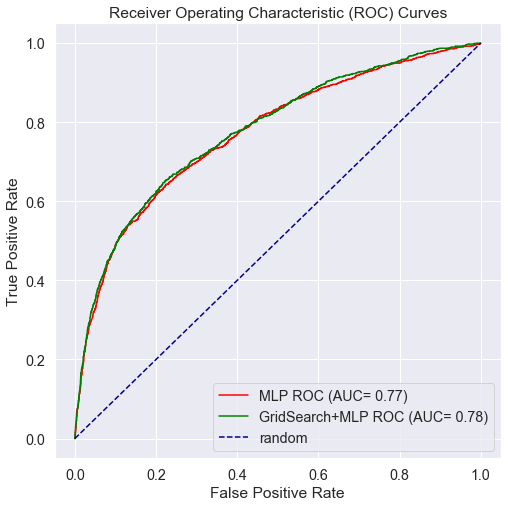

In [74]:
gs_mlp_fpr, gs_mlp_tpr,gs_mlp_thresholds = roc_curve(test_Y, gridsearch_mlp_probs)
mlp_fpr, mlp_tpr, mlp_thresholds = roc_curve(test_Y, mlp_probs)

plt.figure(figsize=(8,8))
plt.plot(mlp_fpr, mlp_tpr, color='red', label='MLP ROC (AUC= %0.2f)'% auc_mlp)
plt.plot(gs_mlp_fpr, gs_mlp_tpr, color='green', label='GridSearch+MLP ROC (AUC= %0.2f)'% gs_mlp_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()